# Home 3: Build a CNN for image recognition.

### Name: Andrew Chen

## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [8]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import optimizers

import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    return to_categorical(y, num_classes=num_class)

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

## Data Augmentation

We use data augmentation to increase the number of training samples we can utilize to train our model.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

## Our Hyperparameters

In [13]:
learning_rate = 1E-4 # to be tuned!
batch_size = 128
epochs = 150
steps_per_epoch = len(x_tr) // batch_size

## Let's Find the Optimal Hyperparameters!

In [ ]:
model = build_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=batch_size),
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs,
                              validation_data=(x_val, y_val))
model.save('cifar10.h5')

## Let's plot our results for these Hyper Parameters...

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Hyperparamter Tuning Model Results

The rate that the accuracy is changing is logarithmic. I suspect that if I had ran more epochs, I would be able to get better performance, but at this point, 150 epochs is enough because I suspect that the improvement in accuracy is minimal per additional epoch due to its logarithmic shape.

My final results:

training accuracy: ~73%

validation accuracy: ~75%

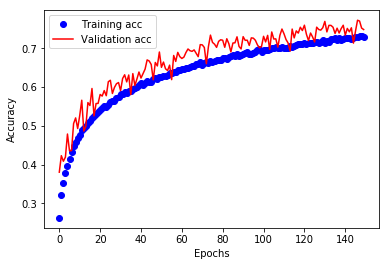

When training I seemed to have my validation always be higher than my training accuracy. I didn't have the time to test it out, but I suspect that my validation data (regular x_val, y_val), which is not being augmented, lacks the variety that my training data (which is being augmented) is subject to.

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [14]:
final_model = build_model()

final_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
__________

In [15]:
history = final_model.fit_generator(datagen.flow(x_train, y_train_vec, batch_size=batch_size),
                              steps_per_epoch=steps_per_epoch,
                              epochs=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
312/312 [==============================] - 26s 84ms/step - loss: 2.0991 - acc: 0.2264
Epoch 2/150
312/312 [==============================] - 23s 74ms/step - loss: 1.8700 - acc: 0.2985
Epoch 3/150
312/312 [==============================] - 22s 72ms/step - loss: 1.7712 - acc: 0.3402
Epoch 4/150
312/312 [==============================] - 22s 72ms/step - loss: 1.7027 - acc: 0.3682
Epoch 5/150
312/312 [==============================] - 22s 72ms/step - loss: 1.6602 - acc: 0.3845
Epoch 6/150
312/312 [==============================] - 22s 72ms/step - loss: 1.6268 - acc: 0.4001
Epoch 7/150
312/312 [==============================] - 22s 71ms/step - loss: 1.5863 - acc: 0.4160
Epoch 8/150
312/312 [==============================] - 22s 72ms/step - loss: 1.5483 - acc: 0.4294
Epoch 9/150
312/312 [==============================] - 23s 72ms/step - loss: 1.5316 - acc: 0.4379
Epoch 10/150
312/312 [==============================] - 23s 73ms/step 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [16]:
loss_and_acc = final_model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 1s 114us/step
loss = 0.7581720972061157
accuracy = 0.7334
